In [1]:
%pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import matplotlib.dates as mdates

end=datetime.now()
start=datetime(end.year-15, end.month, end.day)


# Convert to string format for yfinance
start_str = start.strftime('%Y-%m-%d')
end_str = end.strftime('%Y-%m-%d')

In [75]:
print("Start", start)
print("End", end)

Start 2010-08-08 00:00:00
End 2025-08-08 00:44:13.006915


In [4]:
tickers='ASIANPAINT.BO'
df=yf.download(tickers,start=start_str, end=end_str, auto_adjust=False)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ASIANPAINT.BO,ASIANPAINT.BO,ASIANPAINT.BO,ASIANPAINT.BO,ASIANPAINT.BO,ASIANPAINT.BO
Date,,,,,,
2015-08-07,828.510620,899.650024,924.450012,896.349976,916.000000,100625
2015-08-10,829.707825,900.950012,916.750000,896.400024,907.900024,72929
2015-08-11,815.295349,885.299988,904.900024,881.700012,902.150024,66698
2015-08-12,802.126099,871.000000,893.450012,867.150024,885.000000,73963
2015-08-13,804.981018,874.099976,886.950012,862.500000,875.000000,141670


In [5]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ASIANPAINT.BO,ASIANPAINT.BO,ASIANPAINT.BO,ASIANPAINT.BO,ASIANPAINT.BO,ASIANPAINT.BO
Date,,,,,,
2025-07-31,2396.000000,2396.000000,2415.800049,2374.800049,2380.300049,21540
2025-08-01,2429.449951,2429.449951,2471.649902,2388.000000,2388.000000,48332
2025-08-04,2449.750000,2449.750000,2466.949951,2438.149902,2443.649902,25812
2025-08-05,2437.899902,2437.899902,2464.199951,2408.500000,2450.699951,11424
2025-08-06,2491.300049,2491.300049,2505.399902,2438.000000,2438.000000,139869


In [6]:
df=df.reset_index()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,ASIANPAINT.BO,ASIANPAINT.BO,ASIANPAINT.BO,ASIANPAINT.BO,ASIANPAINT.BO,ASIANPAINT.BO
0,2015-08-07,828.510620,899.650024,924.450012,896.349976,916.000000,100625
1,2015-08-10,829.707825,900.950012,916.750000,896.400024,907.900024,72929
2,2015-08-11,815.295349,885.299988,904.900024,881.700012,902.150024,66698
3,2015-08-12,802.126099,871.000000,893.450012,867.150024,885.000000,73963
4,2015-08-13,804.981018,874.099976,886.950012,862.500000,875.000000,141670


In [7]:
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,ASIANPAINT.BO,ASIANPAINT.BO,ASIANPAINT.BO,ASIANPAINT.BO,ASIANPAINT.BO,ASIANPAINT.BO
0,2015-08-07,828.510620,899.650024,924.450012,896.349976,916.000000,100625
1,2015-08-10,829.707825,900.950012,916.750000,896.400024,907.900024,72929
2,2015-08-11,815.295349,885.299988,904.900024,881.700012,902.150024,66698
3,2015-08-12,802.126099,871.000000,893.450012,867.150024,885.000000,73963
4,2015-08-13,804.981018,874.099976,886.950012,862.500000,875.000000,141670


In [8]:
df.isnull().sum()

Price      Ticker       
Date                        0
Adj Close  ASIANPAINT.BO    0
Close      ASIANPAINT.BO    0
High       ASIANPAINT.BO    0
Low        ASIANPAINT.BO    0
Open       ASIANPAINT.BO    0
Volume     ASIANPAINT.BO    0
dtype: int64

In [9]:
print(df.index)

RangeIndex(start=0, stop=2442, step=1)


Text(0, 0.5, 'Closing Price')

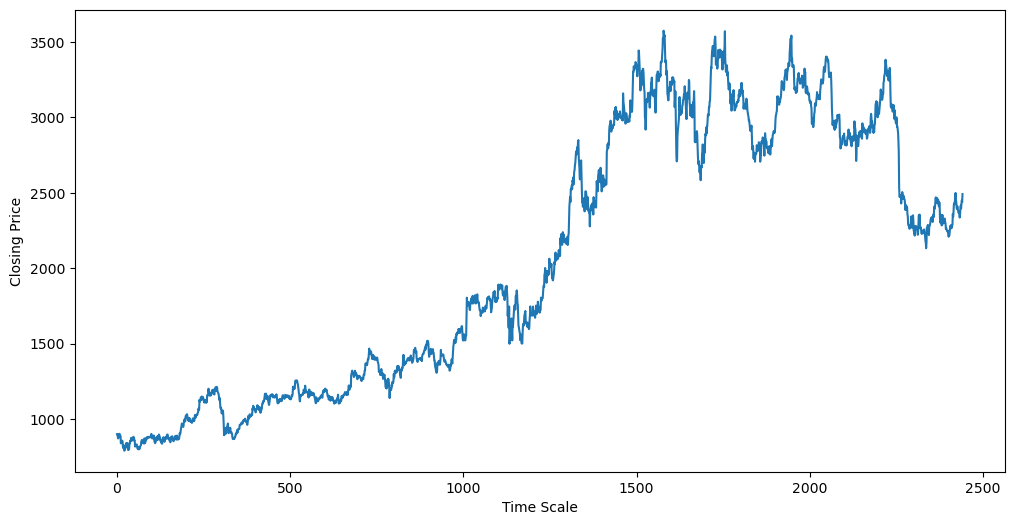

In [10]:

#st.subheader('Closing Price Vs Time Chart')
fig=plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.xlabel("Time Scale")
plt.ylabel("Closing Price")



C:\Users\User\AppData\Local\Temp\ipykernel_41856\2559958888.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  for column in df.drop(columns=['Date']):


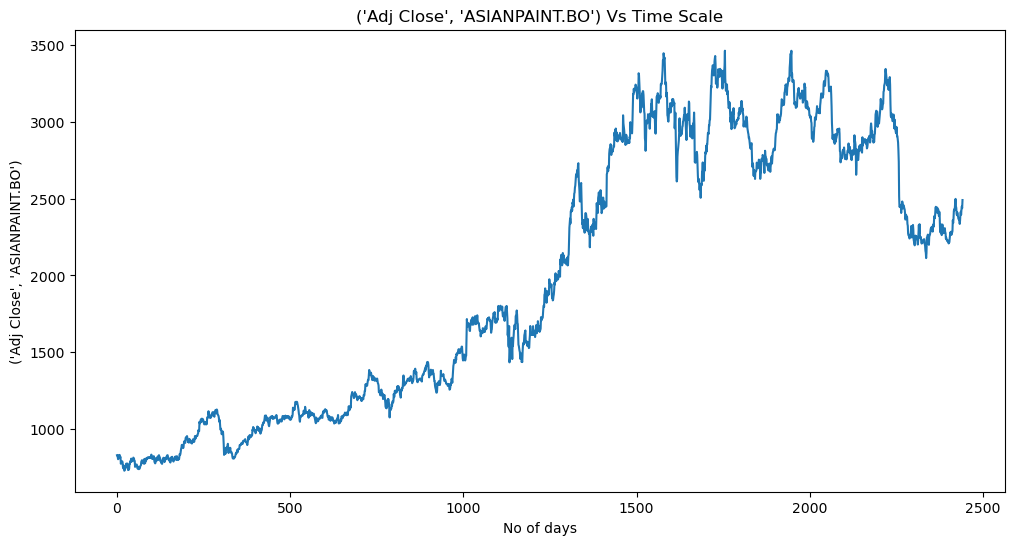

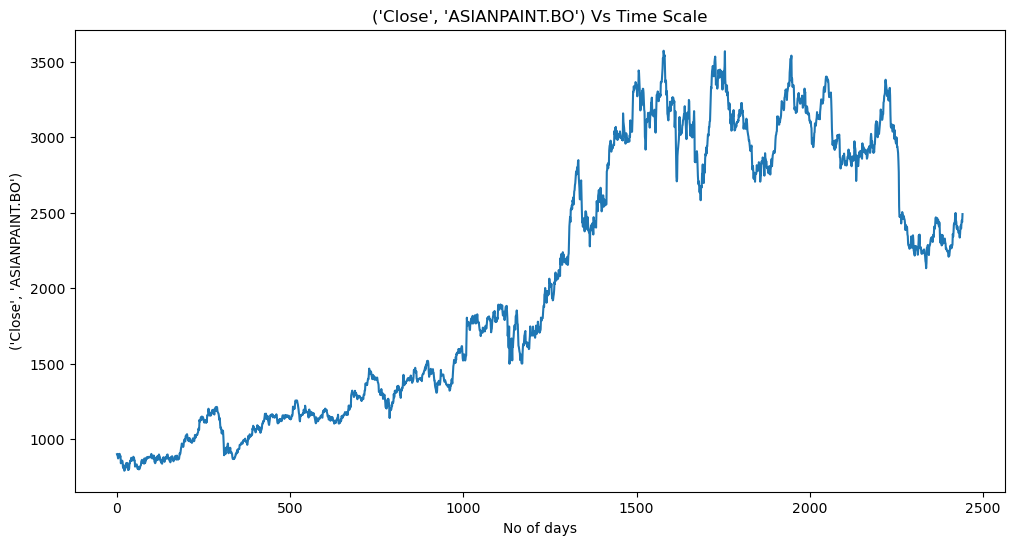

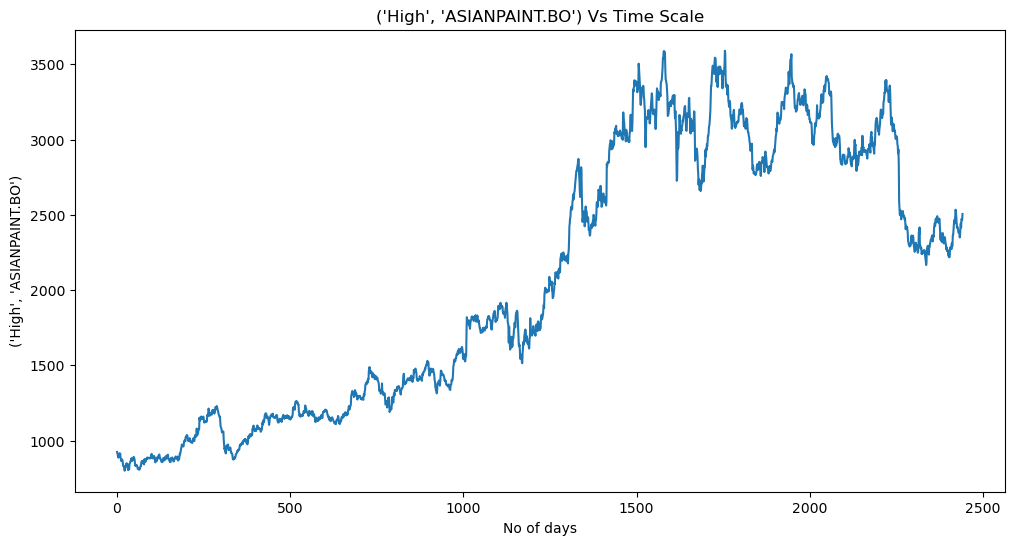

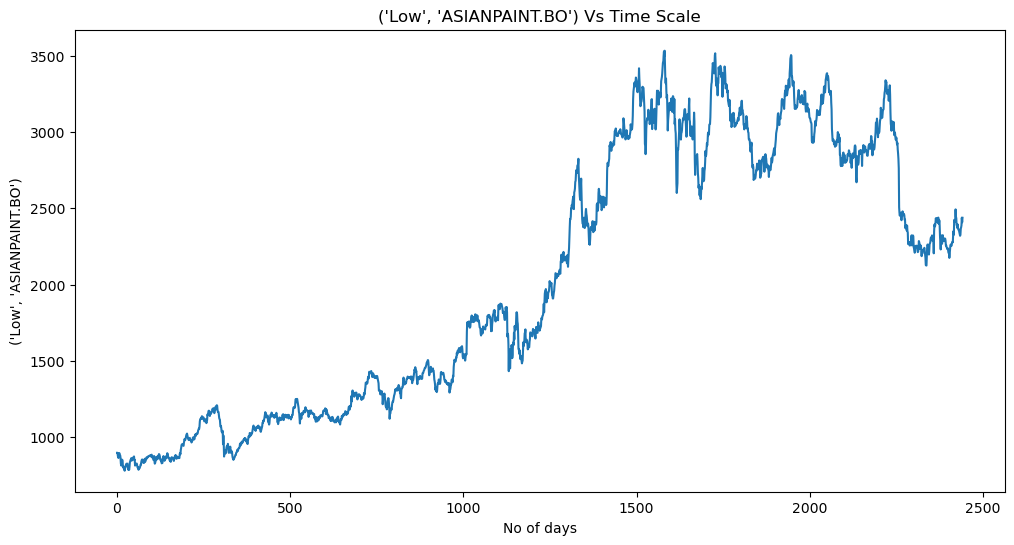

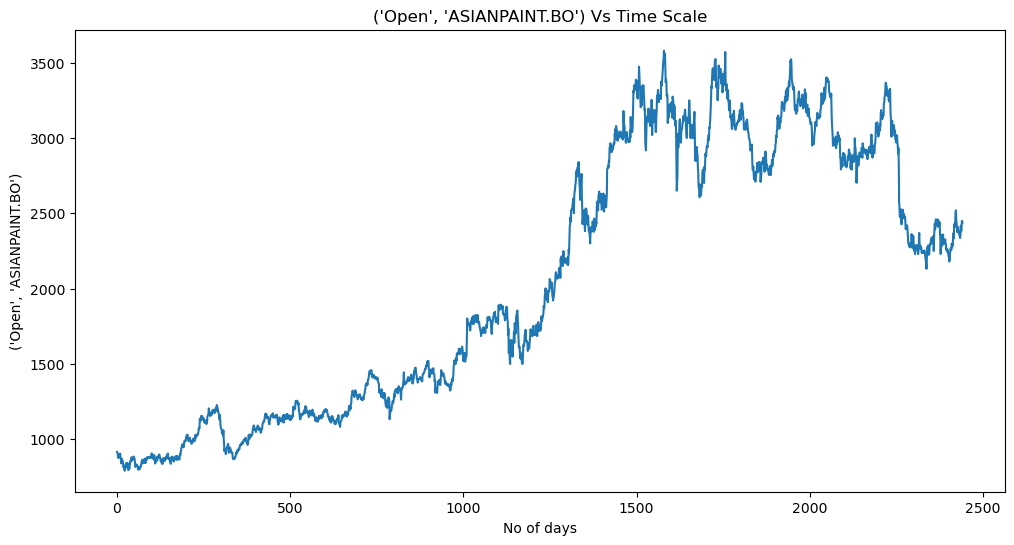

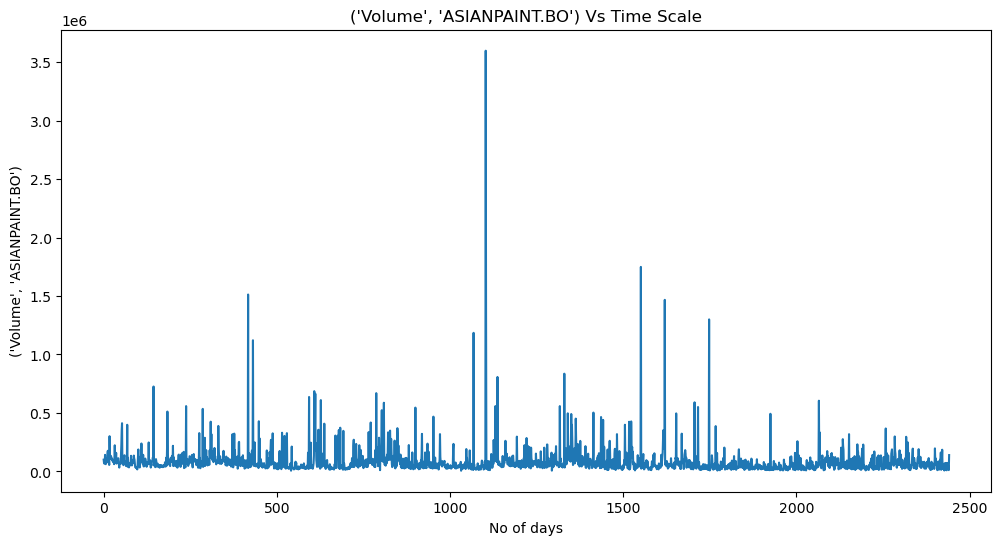

In [11]:
for column in df.drop(columns=['Date']):
    plt.figure(figsize=(12,6))
    plt.plot(df[column])
    plt.xlabel("No of days")
    plt.ylabel(column)
    plt.title(f"{column} Vs Time Scale")
    plt.show()

In [12]:
#moving 100 avg. Startinf from 101 index will have avg of previous 100 closing price. 1st 100 will have NaN value
ma100= df.Close.rolling(100).mean()
ma100

Ticker,ASIANPAINT.BO
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2437,2341.195999
2438,2342.819497
2439,2344.626497
2440,2346.212495


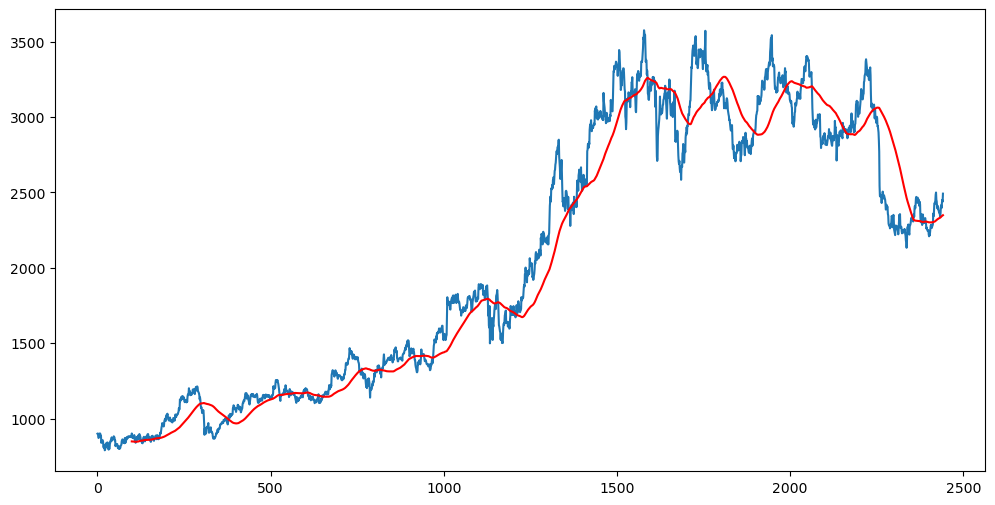

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [14]:
ma200= df.Close.rolling(200).mean()
ma200

Ticker,ASIANPAINT.BO
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2437,2397.635995
2438,2394.481744
2439,2391.539244
2440,2388.529244


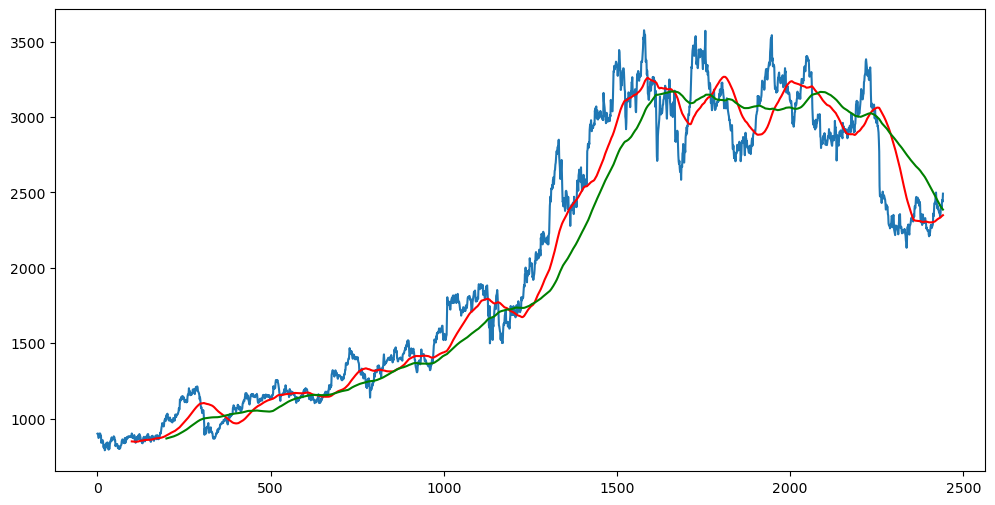

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [16]:
df.shape

(2442, 7)

SPLITTING THE DATA INTO TRAINING & TESTING

In [17]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*.7)])
print(data_training.shape)


(1709, 1)


In [18]:
data_training.head()

Ticker,ASIANPAINT.BO
0,899.650024
1,900.950012
2,885.299988
3,871.000000
4,874.099976


In [19]:
data_training.shape

(1709, 1)

In [20]:
data_testing=pd.DataFrame(df['Close'][int(len(df)*.7):int(len(df))])
print(data_testing.shape) # 30% of 'Close' is testing data

(733, 1)


In [21]:
data_testing.head()

Ticker,ASIANPAINT.BO
1709,3069.300049
1710,3066.149902
1711,3105.850098
1712,3107.600098
1713,3185.449951


In [22]:
data_testing.shape

(733, 1)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
# scale all data into (0,1) range

In [24]:
scaled_training_data=scaler.fit_transform(data_training) 
scaled_training_data

array([[0.03954905],
       [0.0400158 ],
       [0.03439671],
       ...,
       [0.8005673 ],
       [0.80015444],
       [0.79789242]])

In [25]:
scaled_training_data.shape

(1709, 1)

USING TIME SERIES ANALYSIS

In [26]:
x_train=[]
y_train=[]
for i in range(100, scaled_training_data.shape[0]): # (100,1722)
    x_train.append(scaled_training_data[i-100:i])
    y_train.append(scaled_training_data[i,0])

In [27]:
x_train, y_train=np.array(x_train), np.array(y_train)

In [28]:
print(x_train.shape)
print(y_train.shape)

(1609, 100, 1)
(1609,)


MAKING OF ML MODEL

In [29]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


In [30]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [31]:
#from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout,LSTM

In [32]:
from tensorflow.keras.models import Sequential
model=Sequential()

In [33]:
x_train.shape
# ans --1622 samples. Each sample has 100 time steps. Each time step has 1 feature (e.g., closing price)

(1609, 100, 1)

In [34]:
y_train.shape

(1609,)

In [35]:
# ADDING 4 LAYERS( inner layer, hidden layer, outer layer) IN MY LSTM MODEL

model.add(LSTM(units=50, activation='relu', return_sequences=True, 
               input_shape=(100,1)))
# 100 is in index[1] & 1 is bcz we are using only 1 col 'Close'  
# relu works the best                                            
model.add(Dropout(.2))

model.add(LSTM(units=60, activation='relu',return_sequences=True))
model.add(Dropout(.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(.5))

# to connect all layers, add Dense
model.add(Dense(units=1))
# 1 bcz we are predicting only 1 closing price

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy']) 
# adam optimizer works the best, optimizer for gradient descent algorithm
# with each epoch ,training error/loss should decrease & accuracy should increase
model.fit(x_train, y_train, epochs=50, validation_split=.2)
# 50 passes over data to get weights & biases, with each epoch the loss is decreasing
# 20% of the training data is being tested now & the loss & accuracy of the test will appear 

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - accuracy: 0.0000e+00 - loss: 0.0338 - val_accuracy: 0.0031 - val_loss: 0.0365
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - accuracy: 0.0000e+00 - loss: 0.0039 - val_accuracy: 0.0031 - val_loss: 0.0049
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 0.0000e+00 - loss: 0.0033 - val_accuracy: 0.0031 - val_loss: 0.0207
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - accuracy: 0.0000e+00 - loss: 0.0030 - val_accuracy: 0.0031 - val_loss: 0.0247
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.0000e+00 - loss: 0.0028 - val_accuracy: 0.0031 - val_loss: 0.0052
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - accuracy: 0.0000e+00 - loss: 0.0030 - val_accuracy: 0.0031 - val_loss: 0.0033
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.0000e+00 - loss: 0.0025 - val_accuracy: 0.0031 - val_loss: 0.0130
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.0000e+00 

HOW TO IMPROVE THE ACCURACY OF THE MODEL

1. increase the no of epoch
2. set the activation of hidden layer as 'relu'
3. add more no of hidden layers (but in the limit only ,have to do experiments else overfitting)

In [38]:
model.layers[0].get_weights()

[array([[-0.0407145 , -0.15872434,  0.03275077,  0.23343332, -0.07112008,
         -0.0633189 ,  0.06446164, -0.11534304,  0.11350212,  0.16540301,
          0.14485545, -0.00826246,  0.1323542 ,  0.12412108, -0.0291585 ,
          0.025497  , -0.03951591,  0.2512027 ,  0.02852189,  0.05284988,
          0.07702771,  0.0172464 , -0.16406861, -0.00323439, -0.11016919,
          0.06314798,  0.01971768,  0.023548  ,  0.19725825, -0.12438957,
         -0.11447337,  0.04896431,  0.06862991, -0.08809001,  0.03194911,
          0.15006134, -0.09817486,  0.05737731,  0.07410548, -0.05988114,
         -0.10771357,  0.15284963,  0.13670844, -0.06298159,  0.04291463,
         -0.02389722, -0.04330304, -0.0307543 , -0.08218382,  0.00371119,
          0.16955256, -0.03474498,  0.0242866 ,  0.07298782,  0.17558755,
          0.16408905,  0.128444  , -0.09117407, -0.15033329, -0.00194858,
          0.03437164, -0.12313   ,  0.1623078 , -0.08294415, -0.1540031 ,
         -0.16089629, -0.12403822,  0.

In [39]:
model.layers[1].get_weights()

[]

In [40]:
model.layers[2].get_weights()

[array([[-0.00944714,  0.13504352, -0.13812384, ...,  0.06802957,
         -0.03383555, -0.12927938],
        [ 0.04952095,  0.10327107, -0.09742314, ..., -0.0415943 ,
         -0.10238306,  0.10488623],
        [-0.10759058,  0.07764028,  0.08462688, ...,  0.03420017,
          0.08665382,  0.06673854],
        ...,
        [ 0.1355821 ,  0.09228709,  0.08139287, ..., -0.06948007,
          0.15419129, -0.03672101],
        [ 0.03339704,  0.03523251, -0.05278145, ..., -0.08609671,
         -0.03268043,  0.10818651],
        [-0.15770128,  0.02340902, -0.0725942 , ...,  0.12119006,
          0.01924903, -0.08664173]], dtype=float32),
 array([[ 3.5448924e-02,  5.2568618e-02,  6.8774633e-02, ...,
          1.4319719e-02,  2.8661797e-02, -3.8238484e-02],
        [ 1.0269388e-01,  1.1314316e-02,  1.2961810e-04, ...,
         -7.1947038e-02,  7.3146999e-02, -7.6340087e-02],
        [ 2.2116475e-02,  1.0418697e-01, -6.0667805e-02, ...,
          1.0012744e-02,  1.4100777e-01, -4.9170848e-02]

In [41]:
model.layers[3].get_weights()

[]

In [42]:
model.layers[4].get_weights()

[array([[ 0.06214344,  0.07130616, -0.03705235, ...,  0.02785214,
         -0.0412117 ,  0.03646183],
        [ 0.16098057, -0.00347317,  0.05157017, ...,  0.04099755,
          0.15043299, -0.02831974],
        [ 0.08797462, -0.04997924,  0.02519076, ...,  0.0279825 ,
          0.08921385,  0.09187073],
        ...,
        [ 0.1190119 ,  0.12527111,  0.00886058, ...,  0.05134089,
         -0.03224881,  0.03628153],
        [ 0.1456835 , -0.07367279, -0.07957959, ..., -0.1053629 ,
          0.12408357, -0.0141608 ],
        [-0.01788707,  0.0199469 , -0.09036498, ...,  0.09388044,
          0.1281305 ,  0.06550256]], dtype=float32),
 array([[-0.0839529 , -0.09113365,  0.01084644, ..., -0.07781935,
         -0.15128069, -0.05448133],
        [ 0.02467344, -0.09474531, -0.08070456, ..., -0.07957261,
         -0.08149245,  0.08025388],
        [-0.01055886, -0.00868388, -0.07490945, ...,  0.03047086,
          0.00611786,  0.07223003],
        ...,
        [-0.10622721, -0.0207043 , -0.1

In [43]:
model.layers[5].get_weights()

[]

In [44]:
model.layers[6].get_weights()

[array([[ 0.02590198,  0.01906103, -0.02965303, ..., -0.13423564,
          0.07448452,  0.02390002],
        [ 0.03831487,  0.01611525, -0.02413802, ...,  0.09897983,
          0.06084917, -0.02095842],
        [-0.11368572, -0.09834217,  0.04706335, ...,  0.05485607,
          0.04746472, -0.07201584],
        ...,
        [-0.01432122,  0.02643864,  0.08837184, ..., -0.0131045 ,
         -0.06681077,  0.04799715],
        [-0.05422944,  0.01342353, -0.08754367, ...,  0.06175001,
          0.05409648, -0.03415739],
        [-0.07454251, -0.01193251, -0.09692744, ..., -0.01705243,
          0.00702448, -0.10325571]], dtype=float32),
 array([[-0.04748495,  0.05138496, -0.08392981, ..., -0.14584616,
          0.00232592,  0.0001519 ],
        [-0.10063343, -0.06103357, -0.01328431, ..., -0.06175351,
         -0.06536891,  0.08829482],
        [-0.02018663, -0.06793091,  0.02664024, ...,  0.10480985,
         -0.02725716,  0.03003814],
        ...,
        [-0.05906481, -0.05402477, -0.0

In [45]:
model.layers[8].get_weights()

[array([[ 0.17788531],
        [ 0.12370046],
        [ 0.07598604],
        [ 0.1196027 ],
        [-0.06797452],
        [ 0.07599232],
        [ 0.0023739 ],
        [-0.09858302],
        [ 0.14808083],
        [ 0.15578417],
        [ 0.10204268],
        [ 0.11415505],
        [ 0.14233422],
        [-0.0671348 ],
        [ 0.10911687],
        [-0.17628035],
        [ 0.13098486],
        [-0.07870185],
        [-0.05638965],
        [-0.1644694 ],
        [ 0.18484534],
        [ 0.09193876],
        [ 0.19971833],
        [-0.01742422],
        [ 0.09202144],
        [-0.10882973],
        [-0.06073499],
        [ 0.1099101 ],
        [-0.15631689],
        [-0.13729642],
        [-0.07257082],
        [ 0.16881503],
        [-0.09795117],
        [ 0.2120092 ],
        [ 0.10098997],
        [ 0.11418564],
        [ 0.13362165],
        [ 0.1116235 ],
        [ 0.13396776],
        [-0.17715974],
        [ 0.12353365],
        [-0.25716484],
        [ 0.16329484],
        [ 0

In [46]:
model.save('my_model.keras')

In [47]:
data_testing.head()

Ticker,ASIANPAINT.BO
1709,3069.300049
1710,3066.149902
1711,3105.850098
1712,3107.600098
1713,3185.449951


In [48]:
# for predicting the closing price of 1722th day we need closing price of previous 100 days( index)
data_training.tail(100)

Ticker,ASIANPAINT.BO
1609,3239.600098
1610,3067.750000
1611,3120.050049
1612,3172.649902
1613,3028.800049
...,...
1704,2939.649902
1705,2978.250000
1706,3019.199951
1707,3018.050049


In [49]:
past_100_days=data_training.tail(100)
final_df=pd.concat([past_100_days,data_testing], ignore_index=True)

In [50]:
df.shape

(2442, 7)

In [51]:
final_df
# data_testing.shape=(738,1) + data_training.tail(100) = (838,1)
# from index 1622 to 2461

Ticker,ASIANPAINT.BO
0,3239.600098
1,3067.750000
2,3120.050049
3,3172.649902
4,3028.800049
...,...
828,2396.000000
829,2429.449951
830,2449.750000
831,2437.899902


In [52]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.76953825],
       [0.65010251],
       [0.68645102],
       [0.7230079 ],
       [0.62303231],
       [0.51367407],
       [0.42158662],
       [0.40042392],
       [0.4109531 ],
       [0.51621092],
       [0.5413003 ],
       [0.556208  ],
       [0.57695381],
       [0.5936338 ],
       [0.63192834],
       [0.69684123],
       [0.63481252],
       [0.63894773],
       [0.61424047],
       [0.61934878],
       [0.6352642 ],
       [0.62164231],
       [0.63328356],
       [0.65872044],
       [0.6598325 ],
       [0.68210727],
       [0.68478292],
       [0.7000383 ],
       [0.71077601],
       [0.71094976],
       [0.74667266],
       [0.71233975],
       [0.69458248],
       [0.65924169],
       [0.6185496 ],
       [0.59498901],
       [0.66084022],
       [0.71192269],
       [0.71751747],
       [0.69340102],
       [0.6903083 ],
       [0.70608476],
       [0.77558471],
       [0.76932972],
       [0.67265521],
       [0.65587104],
       [0.61455335],
       [0.609

In [53]:
input_data.shape

(833, 1)

In [54]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]): # (100 ,839)
     x_test.append(input_data[i-100:i]) # 0 : 100
     y_test.append(input_data[i,0]) # 100, 0th col 

In [55]:
x_test, y_test=np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(733, 100, 1)
(733,)


MAKING PREDICTIONS

In [56]:
y_predicted=model.predict(x_test)
print(y_predicted.shape)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step
(733, 1)


In [57]:
y_test

array([0.65117979, 0.64899044, 0.67658206, 0.67779831, 0.73190392,
       0.78594014, 0.83399946, 0.8280224 , 0.8782709 , 0.90860756,
       0.9223338 , 0.93206379, 0.92028359, 0.88966882, 0.88442154,
       0.8990861 , 0.95027275, 0.96566709, 0.97525812, 0.93821461,
       0.84581445, 0.85199988, 0.86492694, 0.8553707 , 0.82774446,
       0.84192239, 0.87517818, 0.91361152, 0.90165756, 0.89745278,
       0.87781905, 0.88056443, 0.9153838 , 0.90874653, 0.90346463,
       0.89658403, 0.90798213, 0.8769503 , 0.83900342, 0.82347011,
       0.87573405, 0.8495326 , 0.90579278, 0.87667236, 0.90749566,
       0.92994401, 1.        , 0.87045215, 0.84081032, 0.81283659,
       0.83754386, 0.83135843, 0.84261739, 0.79636513, 0.81175947,
       0.77509825, 0.74983495, 0.73200828, 0.74083474, 0.75980826,
       0.75181576, 0.70139351, 0.66688668, 0.6879452 , 0.662265  ,
       0.63401334, 0.64023355, 0.67724228, 0.712166  , 0.69426977,
       0.70066373, 0.72870703, 0.67637353, 0.66355082, 0.63495

In [58]:
y_test.shape

(733,)

In [59]:
y_predicted

array([[0.5726268 ],
       [0.58671004],
       [0.6001363 ],
       [0.6131532 ],
       [0.6256673 ],
       [0.63848597],
       [0.6528606 ],
       [0.6699096 ],
       [0.68933594],
       [0.7109557 ],
       [0.73432803],
       [0.7584233 ],
       [0.7817897 ],
       [0.80237144],
       [0.8176868 ],
       [0.8264551 ],
       [0.8291897 ],
       [0.82846946],
       [0.8267901 ],
       [0.8259475 ],
       [0.82564956],
       [0.82302207],
       [0.81704944],
       [0.8083094 ],
       [0.797875  ],
       [0.78652865],
       [0.77548355],
       [0.76663876],
       [0.76213664],
       [0.7626924 ],
       [0.7676801 ],
       [0.7751601 ],
       [0.78326577],
       [0.79148686],
       [0.7991336 ],
       [0.805449  ],
       [0.80975217],
       [0.8121284 ],
       [0.8121009 ],
       [0.8088078 ],
       [0.8020045 ],
       [0.79361135],
       [0.78487617],
       [0.7781802 ],
       [0.7742842 ],
       [0.7739941 ],
       [0.7778043 ],
       [0.786

In [60]:
y_predicted.shape

(733, 1)

In [61]:
# to understand the transformation (how features were scaled)
scaler.scale_

array([0.000695])

In [62]:
scaler_factor=1/0.00292629
y_predicted=y_predicted*scaler_factor
y_test=y_test*scaler_factor

In [63]:
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,ASIANPAINT.BO,ASIANPAINT.BO,ASIANPAINT.BO,ASIANPAINT.BO,ASIANPAINT.BO,ASIANPAINT.BO
0,2015-08-07,828.510620,899.650024,924.450012,896.349976,916.000000,100625
1,2015-08-10,829.707825,900.950012,916.750000,896.400024,907.900024,72929
2,2015-08-11,815.295349,885.299988,904.900024,881.700012,902.150024,66698
3,2015-08-12,802.126099,871.000000,893.450012,867.150024,885.000000,73963
4,2015-08-13,804.981018,874.099976,886.950012,862.500000,875.000000,141670


In [64]:
df.Close[int(len(df)*.7):]

Ticker,ASIANPAINT.BO
1709,3069.300049
1710,3066.149902
1711,3105.850098
1712,3107.600098
1713,3185.449951
...,...
2437,2396.000000
2438,2429.449951
2439,2449.750000
2440,2437.899902


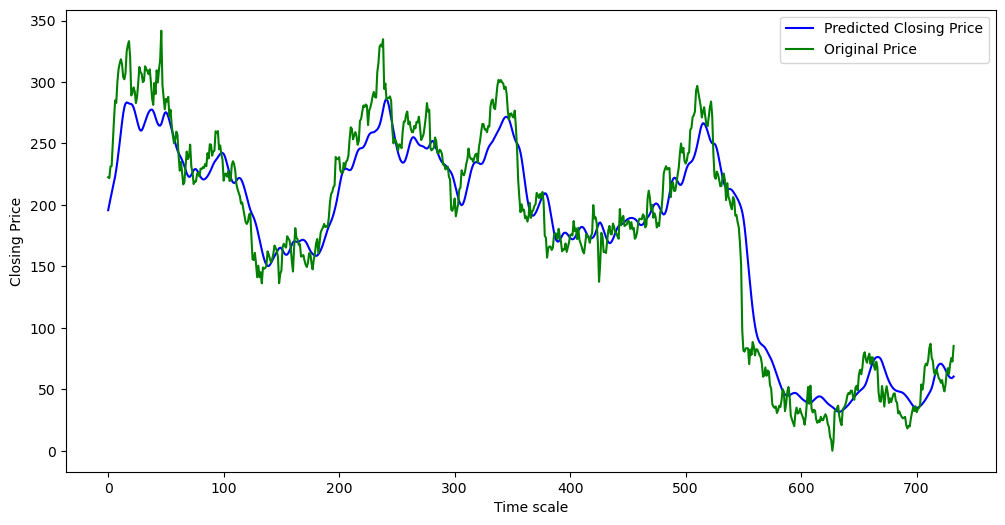

In [65]:
plt.figure(figsize=(12,6))
plt.plot( y_predicted,'b', label='Predicted Closing Price')
plt.plot( y_test,'g', label='Original Price')
plt.xlabel("Time scale")
plt.ylabel("Closing Price")
plt.legend()

In [66]:
data=int(len(df)*.7)
print(data)

1709


In [73]:
from sklearn.metrics import mean_squared_error, r2_score


rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
r2 = r2_score(y_test, y_predicted)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Root Mean Squared Error (RMSE): 22.32
R² Score: 0.94
